# Team-1-ExcelR-P57

# Topic Modelling

## Business objective
Social event tracking and evolution framework to obtain the evolutionary trends of social events and generate effective event summary details over time. The input is the  textual data collected from various social media. Based on the input data, our algorithm can learn multi-modality topics and track multiple events. After tracking, for each event, it can be visualized with texts and image over time. 

## Data Set Details:
Extraction of the textual data from various web sources like "Twitter"

In [1]:
#Installing  libraries
#!pip install tweepy
#!pip install emoji
#!pip install gensim
#!pip install pyLDAvis
#!pip install pyLDAvis

# Importing importantinh libraries
import tweepy

import pandas as pd
import re
import emoji
import nltk

In [2]:
# set variables for keys and tokens to access the Twitter API
mykeys = open('API Twitter.txt','r').read().splitlines()
api_key = mykeys[0]
api_key_secret = mykeys[1]
access_token = mykeys[2]
access_token_secret = mykeys[3]

auth = tweepy.OAuthHandler(consumer_key = api_key, consumer_secret = api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
#Featching the data from twitter
search_words="Technology"
date_since="2021-4-16"
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since)

In [4]:
tweets

In [5]:
import re

In [6]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)

# Iterate and print tweets
s=[]
for tweet in tweets:
    s.append(tweet.text)
    
    

In [7]:
print(s)

['In the year 2000, Ignum might not have been here. In the year 2008, it was here, and some people moved onto it, using the latest technology', "RT @SuDharmapala: They have home testing in Singapore. Technology developed in Australia. And we don't have it here. I cannot tell you how…", 'Will We Ever Fly Supersonically Over Land? https://t.co/QqoLEANaWw via @NewYorker', '#Dogecoin spin-off ‘#BabyDoge’ sees a surge after an #ElonMusk tweet https://t.co/2Y25YOmFhz', "RT @DurgapalSeema: The #cloud is the #Internet—more specifically, it's all of the things you can access #remotely over the Internet.When so…", 'Capita Software New Technology CTO Prototyping - London - Capita Group Resourcing #Directorjobs https://t.co/rALQN51u3r', 'RT @DataProBlog: Maine law restricts facial recognition technology statewide\n▸ https://t.co/NL95WSGLEO\n\n#Privacy #Dataprotection #GDPR #Cyb…', 'RT @seokjinism1: excuse me Sir ....tongue technology 😫\n\n#방탄소년단진 #JIN #BTSJIN #ジン \nhttps://t.co/4Vnkqnvmrj', 'RT @I

In [8]:
import pandas as pd
df=pd.DataFrame({'tweet':s})
df

,tweet
0,"In the year 2000, Ignum might not have been he..."
1,RT @SuDharmapala: They have home testing in Si...
2,Will We Ever Fly Supersonically Over Land? htt...
3,#Dogecoin spin-off ‘#BabyDoge’ sees a surge af...
4,RT @DurgapalSeema: The #cloud is the #Internet...
...,...
995,@KeLepara1 I have tried long distance relation...
996,RT @h2opower_: @JackieFielder_ @shaunking @POT...
997,RT @AyushBajpai24: @dcptrafficlko @uptrafficpo...
998,RT @KathyLueders: Do you have what it takes? W...


In [9]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

523

In [10]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

330

In [11]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
434,RT @JusticeMyanmar: The US has announced measu...,18
422,RT @IndiaPOCO: IT'S THE DESIGN! IT'S THE DESIG...,11
355,RT @BabyDogeCoin: #BabyDoge Featured in @India...,10
539,RT @amarprasadreddy: I will address the Nation...,9
582,RT @janetmachuka_: YouTube Weekend Documentari...,9
540,RT @amzy0_: I 🗽❤ all the people around the wor...,7
657,RT @washingtonpost: Big Instagram and TikTok c...,7
458,RT @PKashwan: Professor at one of the elite in...,6
449,"RT @NASAJPL: #MarsHelicopter’s 9th flight, exp...",6
423,RT @IndiaTodayTech: Mary Wallace Funk was supp...,6


In [12]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


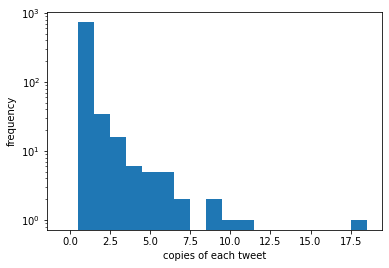

In [13]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [14]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [15]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [16]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,"In the year 2000, Ignum might not have been he...",False,[],[],[]
1,RT @SuDharmapala: They have home testing in Si...,True,[@SuDharmapala],[],[]
2,Will We Ever Fly Supersonically Over Land? htt...,False,[],[@NewYorker],[]
3,#Dogecoin spin-off ‘#BabyDoge’ sees a surge af...,False,[],[],"[#Dogecoin, #BabyDoge, #ElonMusk]"
4,RT @DurgapalSeema: The #cloud is the #Internet...,True,[@DurgapalSeema],[],"[#cloud, #Internet, #remotely]"
...,...,...,...,...,...
995,@KeLepara1 I have tried long distance relation...,False,[],[@KeLepara1],[]
996,RT @h2opower_: @JackieFielder_ @shaunking @POT...,True,[@h2opower_],"[@JackieFielder_, @shaunking, @POTUS]",[]
997,RT @AyushBajpai24: @dcptrafficlko @uptrafficpo...,True,[@AyushBajpai24],"[@dcptrafficlko, @uptrafficpolice, @dtptraffic]",[]
998,RT @KathyLueders: Do you have what it takes? W...,True,[@KathyLueders],[],[]


In [17]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [18]:
hashtags_list_df

,hashtags
3,"[#Dogecoin, #BabyDoge, #ElonMusk]"
4,"[#cloud, #Internet, #remotely]"
5,[#Directorjobs]
6,"[#Privacy, #Dataprotection, #GDPR, #Cyb]"
7,"[#JIN, #BTSJIN]"
...,...
972,"[#Adipurush, #OmRaut, #Prabhas]"
973,"[#iot, #trends, #technology]"
977,"[#SaaS, #B2B, #Sales, #Software, #Cloud]"
982,[#technology]


In [19]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [20]:
flattened_hashtags_df

,hashtag
0,#Dogecoin
1,#BabyDoge
2,#ElonMusk
3,#cloud
4,#Internet
...,...
794,#Sales
795,#Software
796,#Cloud
797,#technology


In [21]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

357

In [22]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [23]:
popular_hashtags

,hashtag,counts
0,#technology,28
1,#AI,19
2,#Technology,19
3,#javascript,14
4,#BabyDoge,11
...,...,...
352,#STEM,1
353,#Safety,1
354,#ScienceToday,1
355,#SearchAndRescue,1


In [24]:
# take hashtags which appear at least this amount of times
min_appearance =10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [25]:
popular_hashtags_set

{'#AI',
 '#ArtificialIntelligence',
 '#BabyDoge',
 '#BigData',
 '#Technology',
 '#javascript',
 '#programming',
 '#technology'}

In [26]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
hashtags_list_df

,hashtags,popular_hashtags
3,"[#Dogecoin, #BabyDoge, #ElonMusk]",[#BabyDoge]
4,"[#cloud, #Internet, #remotely]",[]
5,[#Directorjobs],[]
6,"[#Privacy, #Dataprotection, #GDPR, #Cyb]",[]
7,"[#JIN, #BTSJIN]",[]
...,...,...
972,"[#Adipurush, #OmRaut, #Prabhas]",[]
973,"[#iot, #trends, #technology]",[#technology]
977,"[#SaaS, #B2B, #Sales, #Software, #Cloud]",[]
982,[#technology],[#technology]


In [27]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
popular_hashtags_list_df

,hashtags,popular_hashtags
3,"[#Dogecoin, #BabyDoge, #ElonMusk]",[#BabyDoge]
17,"[#Analytics, #BigData, #DeepLear]",[#BigData]
20,"[#AI, #MachineLearning]",[#AI]
23,"[#Analytics, #BigData]",[#BigData]
24,[#AI],[#AI]
...,...,...
949,[#ArtificialIntelligence],[#ArtificialIntelligence]
950,[#ArtificialIntelligence],[#ArtificialIntelligence]
969,[#technology],[#technology]
973,"[#iot, #trends, #technology]",[#technology]


In [28]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [29]:
hashtag_vector_df

,popular_hashtags,#Technology,#BabyDoge,#technology,#AI,#javascript,#BigData,#programming,#ArtificialIntelligence
3,[#BabyDoge],0,1,0,0,0,0,0,0
17,[#BigData],0,0,0,0,0,1,0,0
20,[#AI],0,0,0,1,0,0,0,0
23,[#BigData],0,0,0,0,0,1,0,0
24,[#AI],0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
949,[#ArtificialIntelligence],0,0,0,0,0,0,0,1
950,[#ArtificialIntelligence],0,0,0,0,0,0,0,1
969,[#technology],0,0,1,0,0,0,0,0
973,[#technology],0,0,1,0,0,0,0,0


In [30]:
import seaborn as sns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
hashtag_matrix

,#Technology,#BabyDoge,#technology,#AI,#javascript,#BigData,#programming,#ArtificialIntelligence
3,0,1,0,0,0,0,0,0
17,0,0,0,0,0,1,0,0
20,0,0,0,1,0,0,0,0
23,0,0,0,0,0,1,0,0
24,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
949,0,0,0,0,0,0,0,1
950,0,0,0,0,0,0,0,1
969,0,0,1,0,0,0,0,0
973,0,0,1,0,0,0,0,0


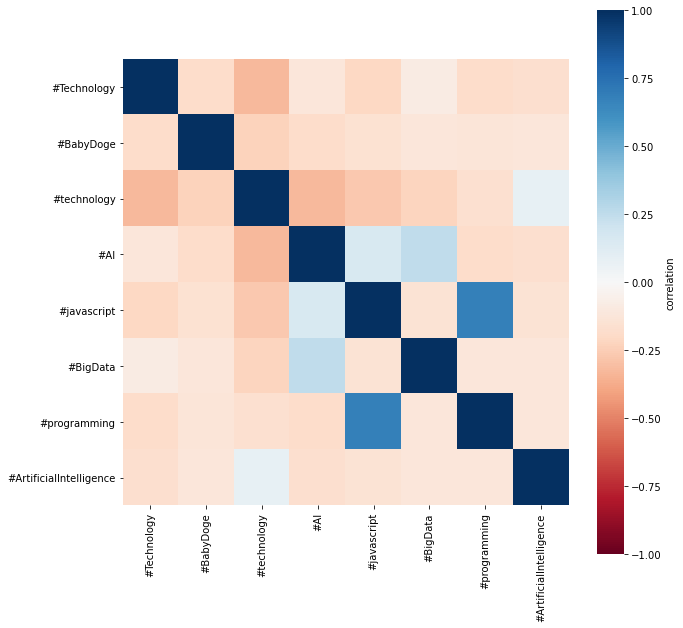

In [31]:

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

# Data Cleaning & Pre-Processing

In [32]:
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [33]:
import nltk
words = set(nltk.corpus.words.words())

In [34]:

tweet=np.array(df.tweet)
tweet
cleaned_tweet=[]
for i in df.tweet:
    no_punc_text = i.translate(str.maketrans('', '', string.punctuation))
    no_punc_text=re.sub("(RT)?(ht)?", "", no_punc_text) # to remove RT and ht word
    no_punc_text1=re.sub("[\W\d]", " ", no_punc_text) #to remove not word character and numbers
    no_punc_text2=re.sub("[^a-zA-Z]", " ", no_punc_text1) #to remove forien language word character
    no_punc_text2=" ".join(w for w in nltk.wordpunct_tokenize(no_punc_text2) \
         if w.lower() in words or not w.isalpha())
    cleaned_tweet.append(no_punc_text2)
df['cleaned_tweet']=cleaned_tweet
df['cleaned_tweet']

0      In the year mig not have been here In the year...
1      They have home testing in Technology in And we...
2                         Will We Ever Fly Over Land via
3                               a surge after an tweet Y
4      The cloud is the more specifically its all of ...
                             ...                        
995    I have tried long distance probably at least t...
996    h Good point What is truly rig now is a techno...
997     Today in i was a wrong just because my car was a
998    Do you have what it We re seeking new work to ...
999    many Thats it mildly it I suppose the owner of...
Name: cleaned_tweet, Length: 1000, dtype: object

In [35]:
df1=df.copy() 
corpus=df1.cleaned_tweet.unique()

In [36]:
len(corpus)

764

##### Text Preprocessing
Steps to preprocess text data:

Convert the text into lowercase <br> 
Split text into words  <br>
Remove the stop loss words <br>
Remove the Punctuation, any symbols and special characters <br>
Normalize the word (I'll be using Lemmatization for normalization) <br>

In [37]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1234\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\1234\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [39]:

# Apply Preprocessing on the Corpus

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word,get_wordnet_pos(word)) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [40]:
clean_corpus

[['year', 'mig', 'year', 'people', 'onto', 'late', 'technology'],
 ['home', 'test', 'technology', 'dont', 'cannot', 'tell'],
 ['ever', 'fly', 'land', 'via'],
 ['surge', 'tweet'],
 ['cloud', 'specifically', 'access', 'remotely'],
 ['new', 'technology', 'group', 'u', 'r'],
 ['law', 'facial', 'recognition', 'technology', 'privacy'],
 ['excuse', 'sir', 'tongue', 'technology'],
 ['mary',
  'funk',
  'suppose',
  'go',
  'space',
  'ago',
  'also',
  'necessary',
  'thing'],
 ['power',
  'unique',
  'skin',
  'response',
  'technology',
  'design',
  'continuously',
  'adapt',
  'skin',
  'environment',
  'around'],
 ['love'],
 ['third',
  'week',
  'workshop',
  'end',
  'message',
  'security',
  'important',
  'need'],
 ['covid',
  'struck',
  'economy',
  'lock',
  'saw',
  'increase',
  'mobile',
  'money',
  'shoot'],
 ['design',
  'design',
  'thats',
  'gotten',
  'fall',
  'new',
  'camera',
  'setup',
  'read'],
 ['hot', 'heat', 'technological', 'revolution', 'couple', 'say', 'lord

In [41]:
# to remove the meaningless words 
#doc=[]
corpus1=[]
for i in clean_corpus:
    doc=[]
    #j=i.split()
    for z in i:
        #print(len(z))
        if len(z)>2:
            doc.append(z)
    #print(doc)
    doc=" ".join(doc)
    doc1=doc.split()
    #print(doc1)
    corpus1.append(doc1)
clean_corpus=corpus1
clean_corpus

[['year', 'mig', 'year', 'people', 'onto', 'late', 'technology'],
 ['home', 'test', 'technology', 'dont', 'cannot', 'tell'],
 ['ever', 'fly', 'land', 'via'],
 ['surge', 'tweet'],
 ['cloud', 'specifically', 'access', 'remotely'],
 ['new', 'technology', 'group'],
 ['law', 'facial', 'recognition', 'technology', 'privacy'],
 ['excuse', 'sir', 'tongue', 'technology'],
 ['mary', 'funk', 'suppose', 'space', 'ago', 'also', 'necessary', 'thing'],
 ['power',
  'unique',
  'skin',
  'response',
  'technology',
  'design',
  'continuously',
  'adapt',
  'skin',
  'environment',
  'around'],
 ['love'],
 ['third',
  'week',
  'workshop',
  'end',
  'message',
  'security',
  'important',
  'need'],
 ['covid',
  'struck',
  'economy',
  'lock',
  'saw',
  'increase',
  'mobile',
  'money',
  'shoot'],
 ['design',
  'design',
  'thats',
  'gotten',
  'fall',
  'new',
  'camera',
  'setup',
  'read'],
 ['hot', 'heat', 'technological', 'revolution', 'couple', 'say', 'lord'],
 ['tech', 'flock'],
 ['weapo

##### Convert Text into Numerical Representation
###### Converting the clean preprocessed corpus to array

In [42]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [43]:
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)

In [44]:
# this is our converted text to numerical representation from the Tf-IDF vectorizer
tf_idf_arr

<764x1717 sparse matrix of type '<class 'numpy.float64'>'
	with 4533 stored elements in Compressed Sparse Row format>

In [45]:
# this is our converted text to numerical representation from the Count vectorizer
cv_arr

<764x1717 sparse matrix of type '<class 'numpy.int64'>'
	with 4533 stored elements in Compressed Sparse Row format>

In [46]:
# Creating vocabulary array which will represent all the corpus 
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()

# get the vocb list
vocab_tf_idf

['ability',
 'able',
 'aborted',
 'abreast',
 'absolutely',
 'abuse',
 'abusive',
 'accelerate',
 'accepted',
 'access',
 'accessible',
 'accord',
 'account',
 'accurately',
 'acid',
 'acquire',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actu',
 'actually',
 'adapt',
 'add',
 'address',
 'administration',
 'administrator',
 'admit',
 'advance',
 'advanced',
 'advantage',
 'advice',
 'advisor',
 'affect',
 'affected',
 'age',
 'agency',
 'aggression',
 'ago',
 'agree',
 'agriculture',
 'aid',
 'aim',
 'air',
 'aircraft',
 'alen',
 'alert',
 'algorithm',
 'alliance',
 'almost',
 'alone',
 'alpha',
 'already',
 'also',
 'always',
 'amaze',
 'analyst',
 'analytics',
 'anarchist',
 'ancient',
 'android',
 'anker',
 'announce',
 'anonymous',
 'another',
 'answer',
 'antecedent',
 'antiquate',
 'antitrust',
 'antivirus',
 'anyone',
 'anything',
 'anywhere',
 'applause',
 'apple',
 'application',
 'apply',
 'appoint',
 'approach',
 'arc',
 'architecture',
 'area',
 'arent',
 'argu

In [47]:
# Creating vocabulary array which will represent all the corpus 
vocab_cv = cv_vectorizer.get_feature_names()

# get the vocb list
vocab_cv

['ability',
 'able',
 'aborted',
 'abreast',
 'absolutely',
 'abuse',
 'abusive',
 'accelerate',
 'accepted',
 'access',
 'accessible',
 'accord',
 'account',
 'accurately',
 'acid',
 'acquire',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actu',
 'actually',
 'adapt',
 'add',
 'address',
 'administration',
 'administrator',
 'admit',
 'advance',
 'advanced',
 'advantage',
 'advice',
 'advisor',
 'affect',
 'affected',
 'age',
 'agency',
 'aggression',
 'ago',
 'agree',
 'agriculture',
 'aid',
 'aim',
 'air',
 'aircraft',
 'alen',
 'alert',
 'algorithm',
 'alliance',
 'almost',
 'alone',
 'alpha',
 'already',
 'also',
 'always',
 'amaze',
 'analyst',
 'analytics',
 'anarchist',
 'ancient',
 'android',
 'anker',
 'announce',
 'anonymous',
 'another',
 'answer',
 'antecedent',
 'antiquate',
 'antitrust',
 'antivirus',
 'anyone',
 'anything',
 'anywhere',
 'applause',
 'apple',
 'application',
 'apply',
 'appoint',
 'approach',
 'arc',
 'architecture',
 'area',
 'arent',
 'argu

In [48]:
display(len(vocab_tf_idf))
display(len(vocab_cv))

1717

1717

# Implementation of LDA

To implement LDA, pass the corpus: document-term matrix to the model. We had above obtained the unique words of vocabulary using both TF-IDF and Count Vectorizer. We can continue with either as have the same unique words in both the obtained vocabularies.

In [49]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [10, 15, 20, 25, 30],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation()

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=0)
gridsearch.fit(cv_arr)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -13673.615611740446


In [50]:
# Implementation of LDA:
    
# Create object for the LDA class 
# Inside this class LDA: define the components:
lda_model = LatentDirichletAllocation(n_components = 10, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(cv_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

##### Retrieve the Topics

In [51]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 10

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    #np.argsort() is used to sort the index based on probablity
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['technology' 'new' 'make' 'use' 'many' 'token' 'get' 'data' 'attack']
Topic 2 ['technology' 'time' 'invest' 'people' 'design' 'much' 'need' 'science'
 'new']
Topic 3 ['technology' 'see' 'stay' 'delivery' 'top' 'pandemic' 'business'
 'lifeline' 'story']
Topic 4 ['technology' 'analytics' 'new' 'read' 'data' 'artificial' 'tool' 'work'
 'intelligence']
Topic 5 ['technology' 'use' 'world' 'late' 'dont' 'understand' 'people'
 'community' 'data']
Topic 6 ['technology' 'get' 'come' 'new' 'key' 'well' 'team' 'money' 'use']
Topic 7 ['technology' 'china' 'space' 'new' 'problem' 'build' 'work' 'amaze'
 'week']
Topic 8 ['day' 'power' 'security' 'attack' 'turn' 'china' 'tech' 'energy' 'use']
Topic 9 ['read' 'twitter' 'full' 'officer' 'report' 'grievance' 'resident' 'set'
 'tec']
Topic 10 ['technology' 'project' 'big' 'mobile' 'must' 'tech' 'science' 'solar'
 'say']


 ##### Annotating the topics the documents

In [52]:
# To view what topics are assigned to the douments:

doc_topic = lda_model.transform(tf_idf_arr)  

# iterating over ever value till the end value
for n in range(doc_topic.shape[0]):
    
    # argmax() gives maximum index value
    topic_doc = doc_topic[n].argmax()
    
    # document is n+1  
    print ("Document", n+1, " -- Topic:" ,topic_doc)

Document 1  -- Topic: 4
Document 2  -- Topic: 1
Document 3  -- Topic: 6
Document 4  -- Topic: 1
Document 5  -- Topic: 7
Document 6  -- Topic: 5
Document 7  -- Topic: 3
Document 8  -- Topic: 9
Document 9  -- Topic: 6
Document 10  -- Topic: 1
Document 11  -- Topic: 9
Document 12  -- Topic: 7
Document 13  -- Topic: 5
Document 14  -- Topic: 3
Document 15  -- Topic: 0
Document 16  -- Topic: 7
Document 17  -- Topic: 5
Document 18  -- Topic: 3
Document 19  -- Topic: 5
Document 20  -- Topic: 5
Document 21  -- Topic: 4
Document 22  -- Topic: 6
Document 23  -- Topic: 3
Document 24  -- Topic: 3
Document 25  -- Topic: 9
Document 26  -- Topic: 0
Document 27  -- Topic: 1
Document 28  -- Topic: 5
Document 29  -- Topic: 2
Document 30  -- Topic: 0
Document 31  -- Topic: 1
Document 32  -- Topic: 7
Document 33  -- Topic: 2
Document 34  -- Topic: 1
Document 35  -- Topic: 6
Document 36  -- Topic: 9
Document 37  -- Topic: 1
Document 38  -- Topic: 5
Document 39  -- Topic: 6
Document 40  -- Topic: 7
Document 

Document 395  -- Topic: 7
Document 396  -- Topic: 0
Document 397  -- Topic: 0
Document 398  -- Topic: 9
Document 399  -- Topic: 8
Document 400  -- Topic: 1
Document 401  -- Topic: 4
Document 402  -- Topic: 3
Document 403  -- Topic: 0
Document 404  -- Topic: 7
Document 405  -- Topic: 0
Document 406  -- Topic: 0
Document 407  -- Topic: 3
Document 408  -- Topic: 8
Document 409  -- Topic: 2
Document 410  -- Topic: 6
Document 411  -- Topic: 0
Document 412  -- Topic: 2
Document 413  -- Topic: 2
Document 414  -- Topic: 5
Document 415  -- Topic: 7
Document 416  -- Topic: 9
Document 417  -- Topic: 8
Document 418  -- Topic: 2
Document 419  -- Topic: 4
Document 420  -- Topic: 4
Document 421  -- Topic: 5
Document 422  -- Topic: 5
Document 423  -- Topic: 3
Document 424  -- Topic: 9
Document 425  -- Topic: 4
Document 426  -- Topic: 3
Document 427  -- Topic: 0
Document 428  -- Topic: 4
Document 429  -- Topic: 2
Document 430  -- Topic: 1
Document 431  -- Topic: 8
Document 432  -- Topic: 5
Document 433

Document 713  -- Topic: 4
Document 714  -- Topic: 5
Document 715  -- Topic: 8
Document 716  -- Topic: 1
Document 717  -- Topic: 6
Document 718  -- Topic: 8
Document 719  -- Topic: 3
Document 720  -- Topic: 9
Document 721  -- Topic: 8
Document 722  -- Topic: 9
Document 723  -- Topic: 5
Document 724  -- Topic: 9
Document 725  -- Topic: 6
Document 726  -- Topic: 3
Document 727  -- Topic: 2
Document 728  -- Topic: 4
Document 729  -- Topic: 4
Document 730  -- Topic: 3
Document 731  -- Topic: 7
Document 732  -- Topic: 8
Document 733  -- Topic: 5
Document 734  -- Topic: 5
Document 735  -- Topic: 7
Document 736  -- Topic: 1
Document 737  -- Topic: 1
Document 738  -- Topic: 4
Document 739  -- Topic: 9
Document 740  -- Topic: 1
Document 741  -- Topic: 5
Document 742  -- Topic: 6
Document 743  -- Topic: 1
Document 744  -- Topic: 5
Document 745  -- Topic: 4
Document 746  -- Topic: 5
Document 747  -- Topic: 6
Document 748  -- Topic: 3
Document 749  -- Topic: 5
Document 750  -- Topic: 9
Document 751

# This is the final output which gives us the topic along with the documents.

In [55]:
import pyLDAvis.sklearn
panel = pyLDAvis.sklearn.prepare(lda_model, cv_arr, cv_vectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\1234\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\1234\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning
